# **Collaborative Filtering - Movie Recomendations**

---

Oleh: Sulaiman

Proyek Final Submission - Machine Learning Terapan

## **Pendahuluan**

Proyek ini membahas tentang movie recomendations yang di buat untuk merekomendasikan film untuk di tonton berdasarkan rating dari masing-masing film tersebut. Proyek ini di buat untuk memenuhi Final Submission - Machine Learning Terapan Dicoding.

## **1. Download dan Persiapkan Dataset**
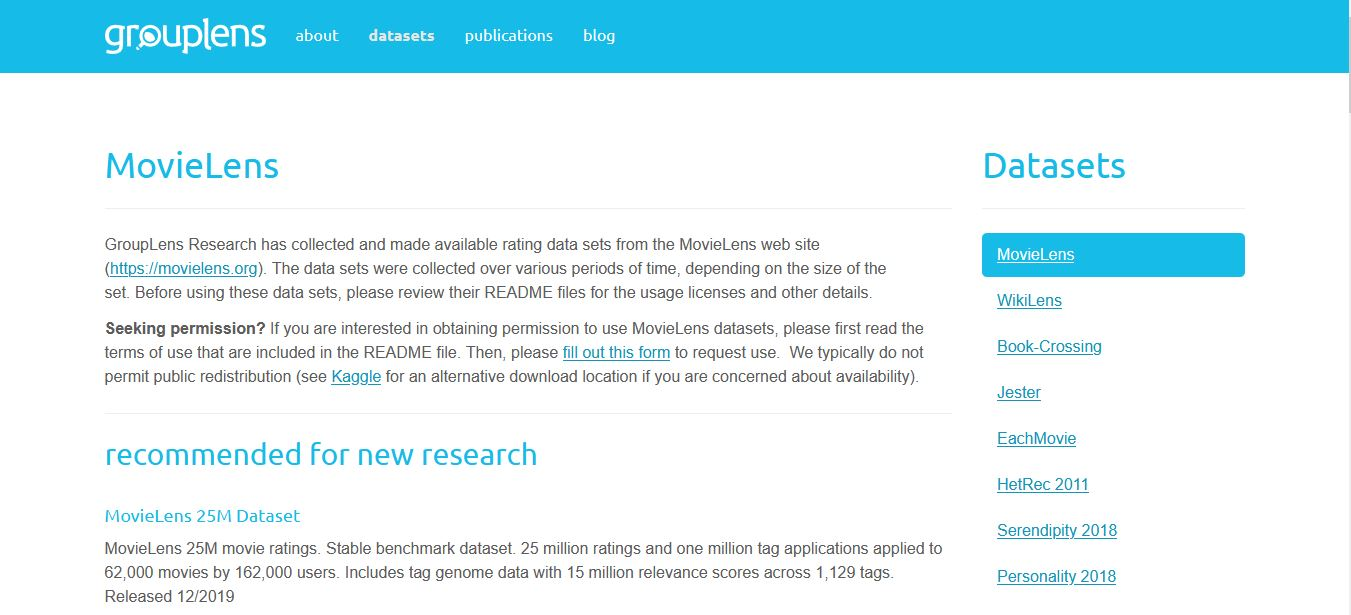

sumber dataset: https://files.grouplens.org/datasets/movielens/ml-latest-small.zip



In [ ]:
# download dataset
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2021-10-20 14:57:44--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.80MB/s    in 0.2s    

2021-10-20 14:57:45 (4.80 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
# unzip file
!unzip /content/ml-latest-small.zip

Archive:  /content/ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
# masukkan dataset ke dalam variabel dan cek jumlah data pada setiap variabel
import pandas as pd

link = pd.read_csv('/content/ml-latest-small/links.csv')
movie = pd.read_csv('/content/ml-latest-small/movies.csv')
rating = pd.read_csv('/content/ml-latest-small/ratings.csv')
tag = pd.read_csv('/content/ml-latest-small/tags.csv')

print('Jumlah link ke sumber-sumber lain dari film: ', len(link.movieId.unique()))
print('Jumlah film: ', len(movie.movieId.unique()))
print('Jumlah rating dari film: ', len(rating.userId.unique()))
print('Jumlah tag dari film: ', len(tag.userId.unique()))

Jumlah link ke sumber-sumber lain dari film:  9742
Jumlah film:  9742
Jumlah rating dari film:  610
Jumlah tag dari film:  58


##**2. Exploratory Data Analysis**


---

Tahap eksplorasi penting untuk memahami variabel-variabel pada data serta korelasi antar variabel. Pemahaman terhadap variabel pada data dan korelasinya akan membantu kita dalam menentukan pendekatan atau algoritma yang cocok untuk data

cek informasi pada dataset:
- link
- movies
- ratings
- tags

In [ ]:
link.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [ ]:
# cek isi data links
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# cek isi data movie
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
# cek isi data rating
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [ ]:
# cek isi data tag
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**Output pada setiap dataset**

1. link: merupakan pengidentifikasi yang digunakan untuk menautkan ke sumber data film lainnya

2. movie: merupakan Informasi film

3. rating: merupakan penilaian pada setiap film

4. tag: merupakan metadata yang dibuat pengguna tentang film.

**variabel yang terdapat pada masing-masing dataset**

1. link:
  - movieId merupakan identifier untuk film yang digunakan oleh https://movielens.org 
  - imdbId merupakan identifier untuk film yang digunakan oleh http://www.imdb.com 
  - tmdbId adalah identifier untuk film yang digunakan oleh https://www.themoviedb.org 

2. movie:
  - movieId merupakan identifier untuk film yang digunakan oleh https://movielens.org 
  - titile merupakan nama film
  - genres merupakan genre pada film

3. tag:
  - userId merupakan identifier untuk user
  - movieId merupakan identifier untuk film yang digunakan oleh https://movielens.org 
  - timestamp merupakan detik sejak tengah malam Coordinated Universal Time(UTC) tanggal 1 januari 1970

2. rating:
  - userId merupakan identifier untuk user
  - movieId merupakan identifier untuk film yang digunakan oleh https://movielens.org 
  - rating merupakan penilaian film
  - timestamp merupakan detik sejak tengah malam Coordinated Universal Time(UTC) tanggal 1 januari 1970

In [ ]:
# cek distribusi rating pada data
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Dari output di atas, diketahui bahwa nilai maksimum rating adalah 5 dan nilai minimumnya adalah 0. Artinya, skala rating berkisar antara 0 hingga 5. 

In [ ]:
# cek berapa user yang memberikan rating
print('Jumlah UserID: ', len(rating.userId.unique()))
print('Jumlah MovieID: ', len(rating.movieId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah UserID:  610
Jumlah MovieID:  9724
Jumlah data rating:  100836


##**2. Data Preprocessing**

---

Preprocessing data merupakan teknik awal data mining untuk mengubah data mentah atau biasa dikenal dengan raw data yang dikumpulkan dari berbagai sumber menjadi informasi yang lebih bersih dan bisa digunakan untuk pengolahan selanjutnya

2.1 Menggabungkan Dataset

In [ ]:
import numpy as np

# Menggabungkan dataset
all_movie = pd.merge(rating, movie, on='movieId')
all_movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


##**3. Data Preparation**

---

Data Preparation atau bisa disebut juga dengan data preprocessing adalah suatu proses/langkah yang dilakukan untuk membuat data mentah menjadi data yang berkualitas

Cek Missiong Value

In [ ]:
all_movie.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

membuat variabel preparation untuk dan mengurutkannya

In [ ]:
preparation = all_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
137,382,1,4.5,1515162628,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
138,385,1,4.0,834691642,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
139,389,1,5.0,857934174,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
140,391,1,3.0,1032388077,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
92965,184,193581,4.0,1537109082,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
92966,184,193583,3.5,1537109545,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
92967,184,193585,3.5,1537109805,Flint (2017),Drama
92968,184,193587,3.5,1537110021,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
# buang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
215,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
267,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
369,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
572,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


konversi data series menjadi list

In [ ]:
# konversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# konversi data series ‘title’ menjadi dalam bentuk list
movie_title = preparation['title'].tolist()

# konversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

9724
9724
9724


3.2 Membuat Dictionary pada 

In [ ]:
# Membuat dictionary untuk data ‘resto_id’, ‘resto_name’, dan ‘cuisine’
movie_new = pd.DataFrame({
    'movieId': movie_id,
    'title': movie_title,
    'genres': movie_genre
})
movie_new

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,6,Heat (1995),Action|Crime|Thriller
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...
9719,160341,Bloodmoon (1997),Action|Thriller
9720,160527,Sympathy for the Underdog (1971),Action|Crime|Drama
9721,160836,Hazard (2005),Action|Drama|Thriller
9722,163937,Blair Witch (2016),Horror|Thriller


##**4. Model Development dengan Collaborative Filtering**

1. Data Understanding

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
# membaca dataset
df = rating
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


2. Data Preparation

---

- encode fitur user
- encode fitur movie

In [ ]:
# mengubah userId menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId : ', user_ids)

# encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# encoding angka ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId : ', user_encoded_to_user)

list userId :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [ ]:
# mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()
print('list movieId : ', movie_ids)

# encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}
print('encoded movieId : ', movie_to_movie_encoded)

# encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}
print('encoded angka ke movieId : ', movie_encoded_to_movie)

list movieId :  [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 264

In [ ]:
# petakan userId dan placeId ke dataframe yang berkaitan
df['user'] = df['userId'].map(user_to_user_encoded)

# mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

cek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float

In [ ]:
# mendapatkan jumlah user
num_user = len(user_to_user_encoded)
print(num_user)

# mendapatkan jumlah movie
num_movie = len(movie_encoded_to_movie)
print(num_movie)

# mengubah rating menjadi float
df['rating'] = df['rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df['rating'])

# nilai maksimal rating
max_rating = max(df['rating'])

print('Number of user: {}, Number of Movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_user, num_movie, min_rating, max_rating
))

610
9724
Number of user: 610, Number of Movie: 9724, Min Rating: 0.5, Max Rating: 5.0


3. Membagi Data untuk Training dan Validasi

---

- acak dataset
- mapping data user dan movie menjadi 1 value
- bagi data train dan validasi

In [ ]:
# mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
67037,432,77866,4.5,1335139641,431,4730
42175,288,474,3.0,978465565,287,474
93850,599,4351,3.0,1498524542,598,2631
6187,42,2987,4.0,996262677,41,194
12229,75,1610,4.0,1158989841,74,727
...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873
54886,364,141,4.0,869443367,363,524
76820,480,6867,4.0,1179163171,479,2240
860,6,981,3.0,845556567,5,712


In [ ]:
# membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# bagi data 80% data train dan 20% data validasi
train_dt = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_dt],
    x[train_dt:],
    y[:train_dt],
    y[train_dt:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


##**5. Proses Training**

---
Pada tahap ini, model menghitung skor kecocokan antara user dan film dengan teknik embedding,
dan membuat class RecommenderNet dengan Menggunakan Keras Model Class.

In [ ]:
class RecommenderNet(tf.keras.Model):

  # inisialisasi fungsi
  def __init__(self, num_user, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embedding movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias= layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:,0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

proses compile model

In [ ]:
model = RecommenderNet(num_user, num_movie, 50) # inisialisasi model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

train model

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50
10084/10084 [==============================] - 72s 7ms/step - loss: 0.6268 - root_mean_squared_error: 0.2224 - val_loss: 0.6127 - val_root_mean_squared_error: 0.2061
Epoch 2/50
10084/10084 [==============================] - 71s 7ms/step - loss: 0.6046 - root_mean_squared_error: 0.1982 - val_loss: 0.6088 - val_root_mean_squared_error: 0.2016
Epoch 3/50
10084/10084 [==============================] - 71s 7ms/step - loss: 0.6002 - root_mean_squared_error: 0.1931 - val_loss: 0.6073 - val_root_mean_squared_error: 0.1998
Epoch 4/50
10084/10084 [==============================] - 69s 7ms/step - loss: 0.5974 - root_mean_squared_error: 0.1898 - val_loss: 0.6072 - val_root_mean_squared_error: 0.1995
Epoch 5/50
10084/10084 [==============================] - 70s 7ms/step - loss: 0.5958 - root_mean_squared_error: 0.1879 - val_loss: 0.6061 - val_root_mean_squared_error: 0.1983
Epoch 6/50
10084/10084 [==============================] - 70s 7ms/step - loss: 0.5945 - root_mean_squared_error: 0.

membuat plot

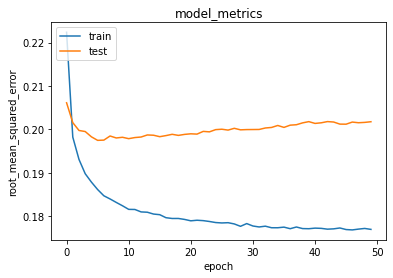

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**6. Mendapatkan Rekomendasi Film**

In [ ]:
movie_df = movie_new
df = pd.read_csv('/content/ml-latest-small/ratings.csv')
     
# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]
 
movie_not_visited = movie_df[~movie_df['movieId'].isin(movie_visited_by_user.movieId.values)]['movieId'] 
movie_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)
     
movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

Mendapatkan Rekomendasi

In [ ]:
ratings = model.predict(user_movie_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('   ' * 9)
print('   ' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ': Genre', row.genres)

print('   ' * 8)
print('   ' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ': Genre', row.genres)

Showing recommendations for users: 370
                           
                           
Movie with high ratings from user
--------------------------------
Pulp Fiction (1994) : Genre Comedy|Crime|Drama|Thriller
Sixth Sense, The (1999) : Genre Drama|Horror|Mystery
Lord of the Rings: The Fellowship of the Ring, The (2001) : Genre Adventure|Fantasy
Lord of the Rings: The Two Towers, The (2002) : Genre Adventure|Fantasy
Trainspotting (1996) : Genre Comedy|Crime|Drama
                        
                        
Top 10 movie recommendation
--------------------------------
Band of Brothers (2001) : Genre Action|Drama|War
Trial, The (Procès, Le) (1962) : Genre Drama
Man Bites Dog (C'est arrivé près de chez vous) (1992) : Genre Comedy|Crime|Drama|Thriller
Paths of Glory (1957) : Genre Drama|War
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976) : Genre Comedy
Adam's Rib (1949) : Genre Comedy|Romance
Heidi Fleiss: Hollywood Madam (1995) : Genre Documen